In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import sklearn.linear_model
import statsmodels.formula.api as smf
%matplotlib inline

In [143]:
house = os.path.join('C:/Users/12370/Desktop/data_science/kc_house_data_NaN.csv')
df = pd.read_csv(house)
df.dropna(inplace = True)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [144]:
df.shape

(21597, 22)

In [145]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [146]:
df.dtypes
df.drop(['id', 'date','Unnamed: 0','waterfront'], axis=1, inplace=True)

In [147]:
df_house = df[df.zipcode ==98112]
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
27,667000.0,3.0,1.00,1400,1581,1.5,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861
260,780000.0,3.0,1.00,1660,4400,1.5,0,3,8,1460,200,1911,0,98112,47.6362,-122.302,1660,4400
305,725000.0,3.0,1.75,1920,3300,1.0,0,4,8,960,960,1913,0,98112,47.6239,-122.298,1740,4000
495,490000.0,2.0,2.50,1230,1391,2.0,0,3,8,870,360,2004,0,98112,47.6192,-122.301,1240,1350
518,2250000.0,4.0,2.25,4760,8036,2.5,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


In [148]:
df_house.shape
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
27,667000.0,3.0,1.00,1400,1581,1.5,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861
260,780000.0,3.0,1.00,1660,4400,1.5,0,3,8,1460,200,1911,0,98112,47.6362,-122.302,1660,4400
305,725000.0,3.0,1.75,1920,3300,1.0,0,4,8,960,960,1913,0,98112,47.6239,-122.298,1740,4000
495,490000.0,2.0,2.50,1230,1391,2.0,0,3,8,870,360,2004,0,98112,47.6192,-122.301,1240,1350
518,2250000.0,4.0,2.25,4760,8036,2.5,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


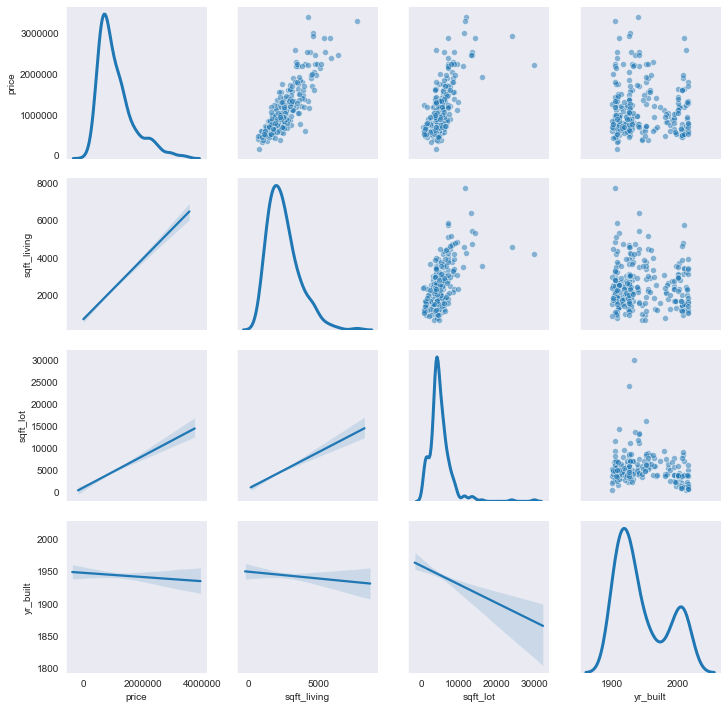

In [149]:
home_info =df_house.loc[:, ('price', 'sqft_living', 'sqft_lot', 'yr_built')]
sns.set_style(style='dark')
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [150]:
drop = df_house.loc[df_house['price']>df_house['price'].std()*3].index
df_house = df_house.drop(index=drop)
df_house.shape

(234, 18)

In [151]:
lot_drop = df_house.loc[df_house['sqft_lot']>df_house['sqft_lot'].quantile(.75)].index
raw_data = df_house.drop(index=lot_drop)

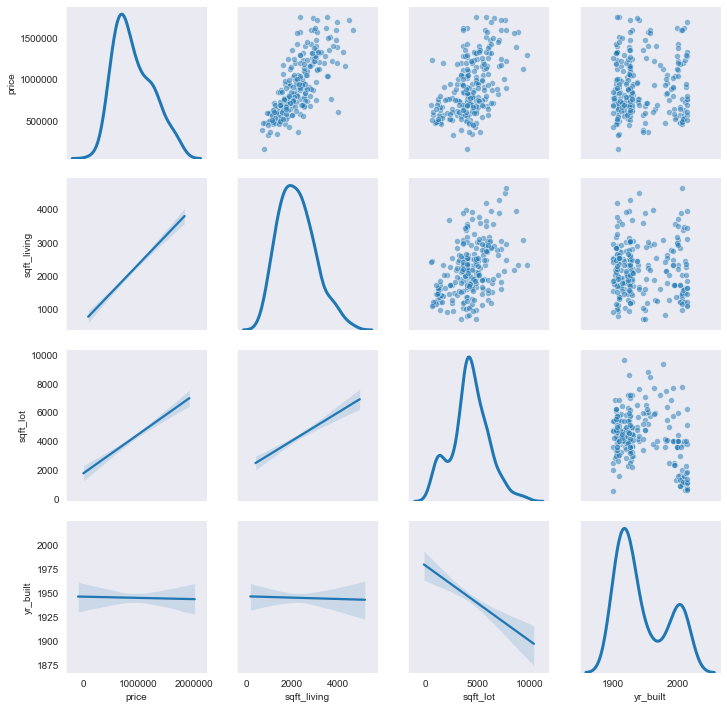

In [152]:
home_info = df_house.loc[:, ('price', 'sqft_living', 'sqft_lot', 'yr_built')]
sns.set_style(style='dark')
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

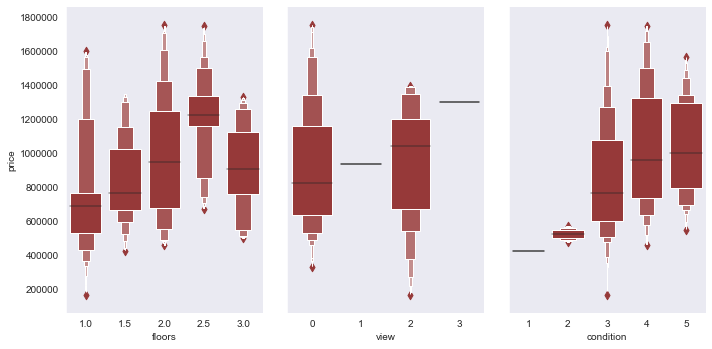

In [154]:
cat = df_house.loc[:, ['price', 'floors','bedrooms', 'bathrooms', 'view', 'condition']]

g = sns.PairGrid(cat, y_vars=['price'], x_vars=['floors', 'view', 'condition'], height=5, aspect=.65)
g = g.map(sns.boxenplot, color='brown')

plt.show()

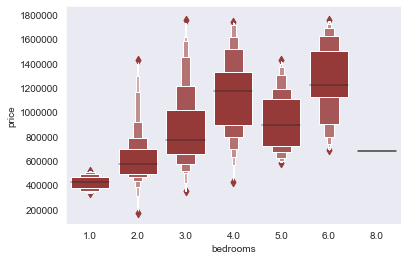

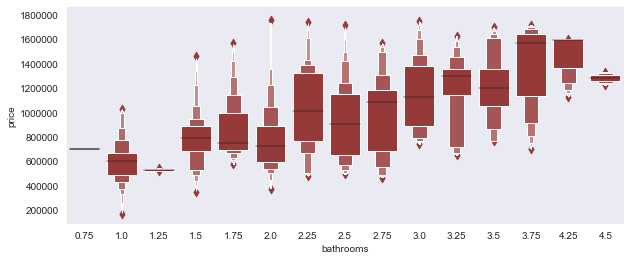

In [155]:
sns.boxenplot(df_house['bedrooms'], y=df_house['price'], color='brown')
plt.show()
plt.figure(figsize=(10,4))
sns.boxenplot(df_house['bathrooms'], y=df_house['price'], color='brown', width=.8)
plt.show()

## Outlier Removal

In [25]:
df_house.loc[df_house['bathrooms']>5]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [26]:
house_drop = df_house.loc[df_house['bedrooms']>15].index
df_house.loc[df_house['bedrooms']>15]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [27]:
bed_drop = df_house.loc[df_house['bedrooms']==0].index
raw_data = df_house.drop(index=bed_drop)

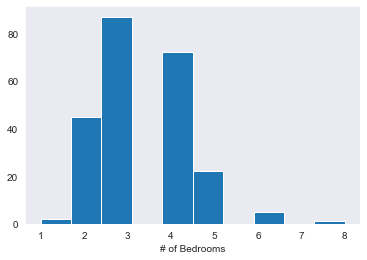

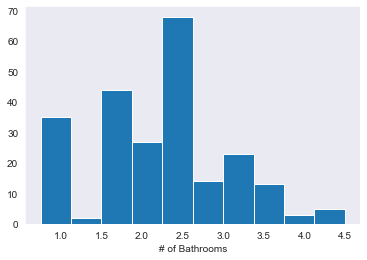

In [156]:
plt.hist(df_house['bedrooms'])
plt.xlabel("# of Bedrooms")
plt.show()

plt.hist(df_house['bathrooms'])
plt.xlabel("# of Bathrooms")
plt.show()

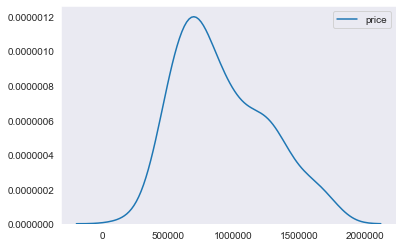

In [157]:
sns.kdeplot(df_house['price'])

In [158]:
df_house['zipcode'] =df_house['zipcode'].astype('object')

In [159]:
df_house.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

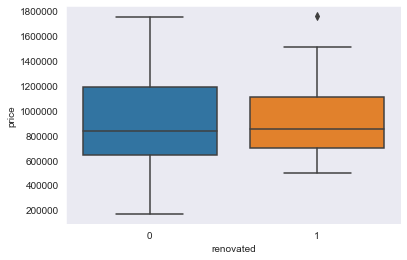

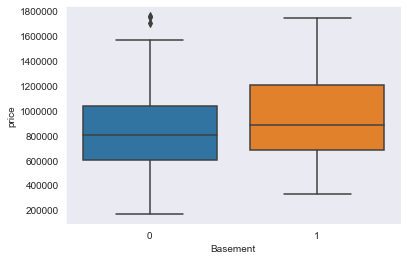

In [160]:
df_house['renovated'] = np.where(df_house['yr_renovated']>0, 1, 0)
sns.boxplot(x='renovated', y='price', data=df_house)
plt.show()
df_house['Basement'] = np.where(df_house['sqft_basement']>0, 1, 0)
sns.boxplot(x='Basement', y='price', data=df_house)
plt.show()

In [161]:
#Remove redundant variables and make a pointer for dummy variables for zipcode
dummies = pd.get_dummies(df_house['zipcode'])
df_house.drop(['sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
               'zipcode'], 1, inplace=True)

In [162]:
X = df_house.drop('price', 1)
Y = df_house['price']
#make dummies for the zipcode
X_dummy = pd.concat([X, dummies], axis=1)
#Dropping some features that are no longer needed"
colnames = X_dummy.columns

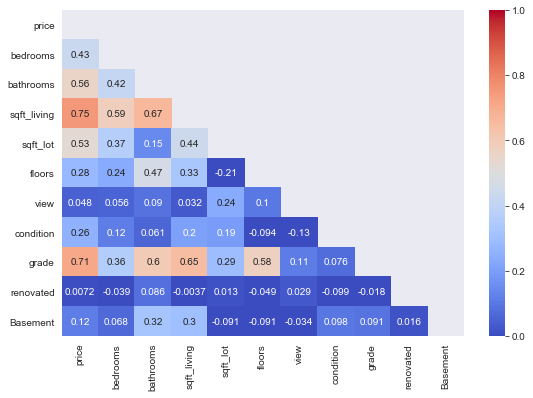

In [163]:
corrmat = df_house.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,6))
sns.heatmap(df_house.corr(), vmin=0, vmax=1, annot=True, mask=mask, cmap='coolwarm')
# sqft_living has the highest correlation w price, so we can use that for the simple linear regression

In [164]:
print("Correlations of features against Price")
display(df_house.corr().iloc[:, 0].sort_values(ascending=False))
df_house.columns

Correlations of features against Price


price          1.000000
sqft_living    0.751333
grade          0.711783
bathrooms      0.556562
sqft_lot       0.529444
bedrooms       0.431995
floors         0.283120
condition      0.261180
Basement       0.115439
view           0.048120
renovated      0.007201
Name: price, dtype: float64

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'renovated', 'Basement'],
      dtype='object')

## PCA for colinear features

In [165]:
from sklearn.preprocessing import StandardScaler
df_pca = X.loc[:, ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors']]
scalar = StandardScaler(with_mean=True, with_std=True)
scalar = scalar.fit_transform(df_pca)

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_comp = pca.fit_transform(scalar)

df_components = pd.DataFrame(principal_comp, index=X.index, columns=['Living Quality'])

In [167]:
X_ = pd.concat([df_components, X], 1)
X_dummy_pca = pd.concat([df_components, X_dummy], 1)

In [168]:
X_.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)
X_dummy_pca.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)

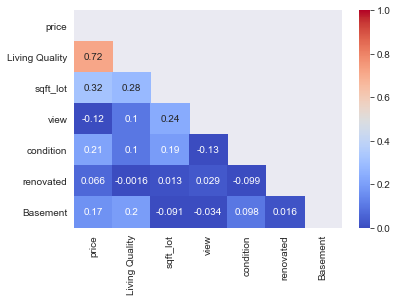

In [169]:
X_pca = pd.concat([raw_data['price'], X_], 1)
corrmat = X_pca.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_pca.corr(), vmin=0, vmax=1, mask=mask, annot=True, cmap='coolwarm')

## Center predictor variables so we can have a more robust linear model

In [170]:
scalar = StandardScaler(with_mean=True, with_std=True)
scaled = scalar.fit_transform(X) #for lasso and the basic regression on non-PCA features
scaled_df = pd.DataFrame(scaled, index=X.index, columns=X.columns)

X_scaled = pd.concat([scaled_df, dummies], 1) #final dataframe that we will use
#standardize features so that any extreme values in features are accounted for and coefficients are more interpretable

In [171]:
print('Original features scaled:')
display(X_scaled.head())

Original features scaled:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,renovated,Basement,98112
27,-0.359231,-1.499025,-1.014500,-1.513300,-0.527129,-0.237743,2.135945,-0.190709,-0.361158,-1.348806,1
260,-0.359231,-1.499025,-0.687247,0.079204,-0.527129,-0.237743,-0.633092,-0.190709,-0.361158,0.741397,1
305,-0.359231,-0.561132,-0.359994,-0.542206,-1.490785,-0.237743,0.751427,-0.190709,-0.361158,0.741397,1
495,-1.325440,0.376760,-1.228473,-1.620634,0.436528,-0.237743,-0.633092,-0.190709,-0.361158,0.741397,1
754,-0.359231,-0.561132,-1.052260,-0.231501,-1.490785,-0.237743,2.135945,-1.140196,2.768875,0.741397,1


### Simple Linear Regression

In [172]:
# First, we make a dataframe to hold the results of our evaluations
evaluation = pd.DataFrame(index=np.arange(0,6),
                          columns=['Model', 'Mean Absolute Error (MAE)', 'CrossVal Score (avg)', 'CrossVal variance'])


In [173]:
from sklearn.linear_model import LinearRegression
simple_X = df_house.loc[:, 'sqft_living'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(simple_X, Y, test_size=.2, random_state=10)
lr = LinearRegression(fit_intercept=True)
#Using the sqft_living as the feature as it correlates the most with price
lr.fit(X_train, Y_train)

pearson_test = lr.score(X_test, Y_test)
print("\n20% holdout test score: \n", pearson_test)
print('\nIntercept:')
print(lr.intercept_)
print('\nCoefficients:')
print(lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, lr.predict(X_test)), '.3f')


20% holdout test score: 
 0.3048855342814135

Intercept:
169059.24130541517

Coefficients:
[330.53393678]


In [174]:
simple_cross = cross_val_score(lr, simple_X, Y, cv=10)
simple_cross

array([0.62659165, 0.64490037, 0.50691942, 0.52224148, 0.46067546,
       0.5124634 , 0.69146794, 0.05488113, 0.53559564, 0.87791755])

In [175]:
evaluation.iloc[0] = ['Simple Linear Model', mae, simple_cross.mean(), simple_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


### Use all features

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=123)
full_lr = LinearRegression(fit_intercept=True) #We normalized the data, so no intercept needed
full_lr.fit(X_train, Y_train)

print("20% sample test score: ", full_lr.score(X_test, Y_test))
print("\nIntercept: ", full_lr.intercept_)
print("\nCoefficients: ", full_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, full_lr.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#multicollinearity can explain why some of these coefficients are negative

20% sample test score:  0.5696096102389976

Intercept:  -756304.3165082515

Coefficients:  [ 4.98755904e+03  3.77423312e+03  1.96483436e+02  3.18329107e+01
 -2.73934344e+04 -2.96274205e+04  4.30370910e+04  1.24055056e+05
  3.23474557e+04 -4.79358648e+04  0.00000000e+00]

Mean Absolute Error:  171711.148


In [177]:
multi_cross = cross_val_score(full_lr, X_dummy, Y, cv=10)
multi_cross

array([0.77108827, 0.77529907, 0.44412283, 0.69505068, 0.51118829,
       0.70824685, 0.62576252, 0.5237275 , 0.70305706, 0.9133484 ])

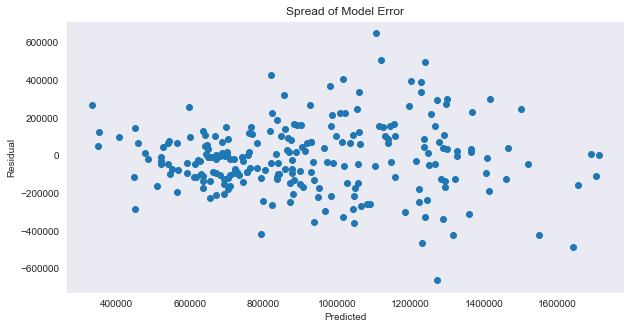

In [118]:
predicted = full_lr.predict(X_dummy)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")
#plt.ylim([-5,10])
plt.show()
#Error distribution is not even, so a better model is needed

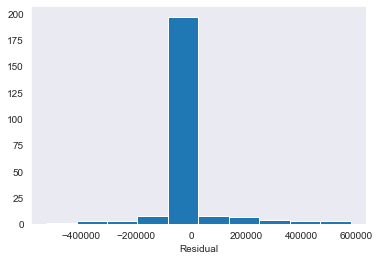

In [178]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [179]:
evaluation.iloc[1] = ['Multivariable Regression (non-PCA)', mae, multi_cross.mean(), multi_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,Multivariable Regression (non-PCA),171711.148,0.667089,0.135358
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


### Multiple Variable Regression with PCA

In [180]:

X_train, X_test, Y_train, Y_test = train_test_split(X_dummy_pca, Y, test_size=.2, random_state=10)
comp_lr = LinearRegression(fit_intercept=True)
comp_lr.fit(X_train, Y_train)
pearson_test = comp_lr.score(X_test, Y_test)
print("20% sample test score: ", pearson_test)
print("\nIntercept: ", comp_lr.intercept_)
print("\nCoefficients: ", comp_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, comp_lr.predict(X_test)), '.3f')
print("\nMean Squared Error: ", mae)
X_train.columns

20% sample test score:  0.47840630417571295

Intercept:  408243.4835132467

Coefficients:  [ 1.28247710e+05  6.07332953e+01 -7.76140688e+04  6.66607779e+04
  3.25415681e+04  1.49607827e+04  0.00000000e+00]

Mean Squared Error:  194007.743


Index(['Living Quality',       'sqft_lot',           'view',      'condition',
            'renovated',       'Basement',            98112],
      dtype='object')

In [181]:
pca_cross = cross_val_score(comp_lr, X_dummy_pca, Y, cv=10)
pca_cross

array([0.7263563 , 0.70239036, 0.24593792, 0.62957439, 0.4453903 ,
       0.71238053, 0.61992123, 0.48227726, 0.68781616, 0.87463912])

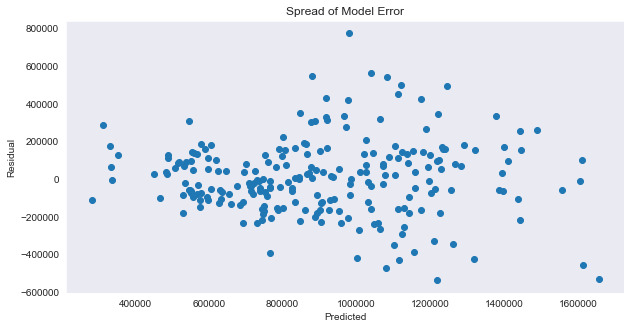

In [124]:
predicted = comp_lr.predict(X_dummy_pca)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")

plt.show()

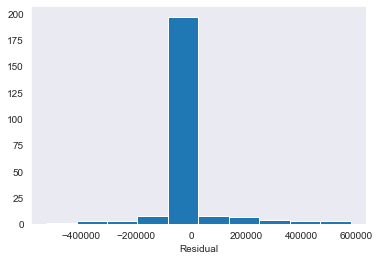

In [182]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [183]:
evaluation.iloc[2] = ['Multivariable Regression (PCA feats)', mae, pca_cross.mean(), pca_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,Multivariable Regression (non-PCA),171711.148,0.667089,0.135358
2,Multivariable Regression (PCA feats),194007.743,0.612668,0.168821
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


### Lasso Regression

In [184]:
from sklearn.linear_model import Lasso
#Lets try to do lasso without the pca to see if we can get some interpretability
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.2, random_state=10)
lasso = Lasso(alpha=.0001, fit_intercept=False, random_state=123, max_iter=5000, tol=.0001)
#try different lambdas
lasso.fit(X_train, Y_train)
print(X_scaled.columns)
print("\n20% sample score: ", lasso.score(X_test, Y_test))
print("\nCoefficients: ", lasso.coef_)

mae = format(metrics.mean_absolute_error(Y_test, lasso.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#convert into scientific notation for better interpretability

Index([   'bedrooms',   'bathrooms', 'sqft_living',    'sqft_lot',
            'floors',        'view',   'condition',       'grade',
         'renovated',    'Basement',         98112],
      dtype='object')

20% sample score:  0.5193377857540366

Coefficients:  [-14804.97985744  31130.53698107 143123.13172069  70600.37735599
  -1819.53843617 -31387.44479325  44437.85604865 117384.44351563
   8965.62548806 -16505.22066708 899495.92358674]

Mean Absolute Error:  193053.918


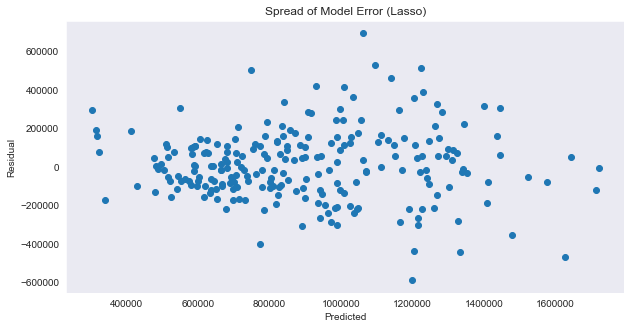

In [185]:
predicted = lasso.predict(X_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Lasso)")
plt.show()
#Error distribution is not even, so a better model is needed

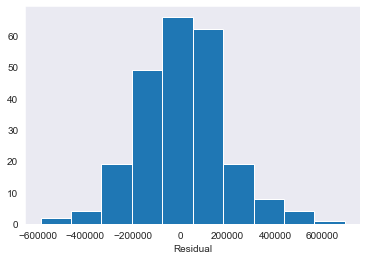

In [186]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [187]:
lass_cross = cross_val_score(lasso, X_scaled, Y, cv=10)
lass_cross

array([0.77108827, 0.77529907, 0.44412283, 0.69505068, 0.51118829,
       0.70824685, 0.62576252, 0.5237275 , 0.70305706, 0.9133484 ])

In [188]:
evaluation.iloc[3] = ['Lasso', mae, lass_cross.mean(), lass_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,Multivariable Regression (non-PCA),171711.148,0.667089,0.135358
2,Multivariable Regression (PCA feats),194007.743,0.612668,0.168821
3,Lasso,193053.918,0.667089,0.135358
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


### Ridge

In [189]:
from sklearn.linear_model import Ridge
#Lets try to do lasso without the pca to see if we can get some interpretability
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.2, random_state=10)
ridge = Ridge(alpha=10, fit_intercept=False, random_state=123, max_iter=5000, tol=.0001)
#try different lambdas
ridge.fit(X_train, Y_train)
print(X_scaled.columns)
print("\n20% sample score: ", ridge.score(X_test, Y_test))
print("\nCoefficients: ", ridge.coef_)

mae = format(metrics.mean_absolute_error(Y_test, ridge.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#convert into scientific notation for better interpretability

Index([   'bedrooms',   'bathrooms', 'sqft_living',    'sqft_lot',
            'floors',        'view',   'condition',       'grade',
         'renovated',    'Basement',         98112],
      dtype='object')

20% sample score:  0.4577612540174254

Coefficients:  [-11849.4231889   35180.24725398 131208.09873943  70866.20801289
   3314.77875699 -29194.80350925  45346.60566219 110745.82046713
   5925.62279099 -11518.31124129 853475.21828103]

Mean Absolute Error:  204300.399


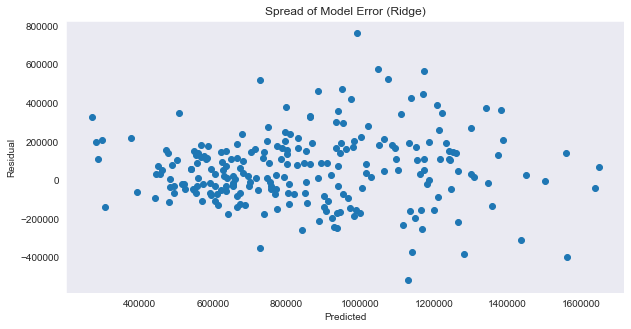

In [190]:
predicted = ridge.predict(X_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Ridge)")
plt.show()
#Error distribution is not even, so a better model is needed

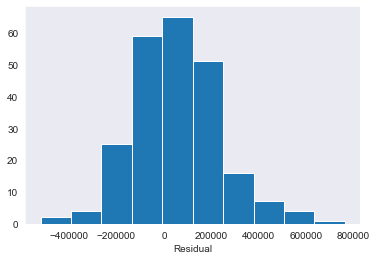

In [191]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [192]:
ridge_cross = cross_val_score(ridge, X_scaled, Y, cv=10)
ridge_cross

array([0.78348596, 0.73920206, 0.49797486, 0.69212849, 0.46070025,
       0.67941446, 0.61855664, 0.52165436, 0.6917118 , 0.8886203 ])

In [193]:
evaluation.iloc[4] = ['Ridge', mae, ridge_cross.mean(), ridge_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,Multivariable Regression (non-PCA),171711.148,0.667089,0.135358
2,Multivariable Regression (PCA feats),194007.743,0.612668,0.168821
3,Lasso,193053.918,0.667089,0.135358
4,Ridge,204300.399,0.657345,0.127657
5,NaN,NaN,NaN,NaN


### Gradient Boosting Regressor for feature selection

In [194]:
from sklearn import ensemble
param = {"max_depth": 6,
          "max_features": (len(X_dummy.columns)//3), #many statistical papers suggest n_feats/3 for regression
          "random_state": 10,
          "learning_rate": .125,
          "n_estimators": 190}
boost = ensemble.GradientBoostingRegressor(**param)
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=10)

boost.fit(X_train, Y_train)
pearson_test = boost.score(X_test, Y_test)
print("\n20% sample score: ", pearson_test)
mae_boost = format(metrics.mean_absolute_error(Y_test, boost.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae_boost)


20% sample score:  0.47102039669318

Mean Absolute Error:  198682.404


In [195]:
clean = []
remove = []
feat_labels = X.columns
for feature in zip(feat_labels, boost.feature_importances_):
    if (feature[1]<0):
        print(feature)
        remove.append(feature[0])
    elif (feature[1]>.01):
        print(feature)
        clean.append(feature[0])
X = X.drop(remove, axis=1)
X_ = X_.drop(remove, axis=1)
print(clean)

('bedrooms', 0.11408291516992813)
('bathrooms', 0.11296225457143089)
('sqft_living', 0.3114879138536961)
('sqft_lot', 0.12805070056026158)
('floors', 0.05415269178540481)
('condition', 0.03818235901543286)
('grade', 0.22042049825579396)
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']


In [138]:
boost_cross = cross_val_score(boost, X_dummy, Y, cv=10)
boost_cross

array([0.73533163, 0.69438502, 0.22927908, 0.61123964, 0.54427272,
       0.66935177, 0.53665654, 0.5758039 , 0.67785665, 0.88294565])

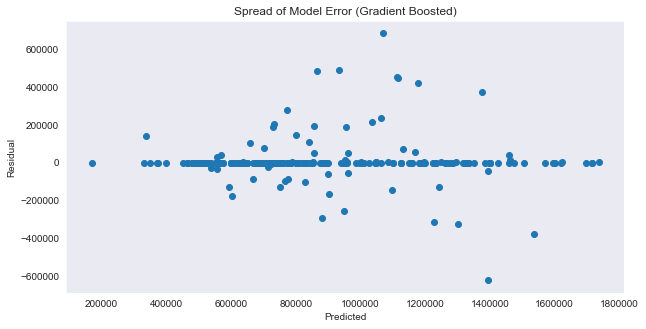

In [196]:
predicted = boost.predict(X_dummy)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Gradient Boosted)")
plt.show()

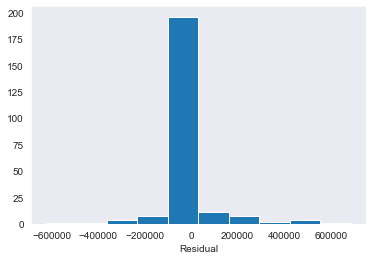

In [197]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [198]:
evaluation.iloc[5] = ['Gradient Boosted Regressor', mae_boost, boost_cross.mean(), boost_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,Multivariable Regression (non-PCA),171711.148,0.667089,0.135358
2,Multivariable Regression (PCA feats),194007.743,0.612668,0.168821
3,Lasso,193053.918,0.667089,0.135358
4,Ridge,204300.399,0.657345,0.127657
5,Gradient Boosted Regressor,198682.404,0.615712,0.161539


## Final evaluation of model choice

In [199]:
evaluation.iloc[np.argsort(evaluation['CrossVal Score (avg)'])].reset_index(drop=True)

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,210970.861,0.543365,0.199835
1,Multivariable Regression (PCA feats),194007.743,0.612668,0.168821
2,Gradient Boosted Regressor,198682.404,0.615712,0.161539
3,Ridge,204300.399,0.657345,0.127657
4,Multivariable Regression (non-PCA),171711.148,0.667089,0.135358
5,Lasso,193053.918,0.667089,0.135358
